Import Tools

In [1]:
#Import tools 

import scipy
from scipy.io import loadmat
from scipy.stats import skew
from scipy.stats import kurtosis

import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD #stochastic gradient descent 
import seaborn as sns 
from matplotlib import ticker

Import data and plot windward tap 95 cp v time 

Now reading:  ../../../data/T215_4_000_1.mat
Now reading:  ../../../data/T215_4_005_1.mat
Now reading:  ../../../data/T215_4_010_1.mat
Now reading:  ../../../data/T215_4_015_1.mat
Now reading:  ../../../data/T215_4_020_1.mat
Now reading:  ../../../data/T215_4_025_1.mat
Now reading:  ../../../data/T215_4_030_1.mat
Now reading:  ../../../data/T215_4_035_1.mat
Now reading:  ../../../data/T215_4_040_1.mat
Now reading:  ../../../data/T215_4_045_1.mat
Now reading:  ../../../data/T215_4_050_1.mat
Now reading:  ../../../data/T215_4_055_1.mat
Now reading:  ../../../data/T215_4_060_1.mat
Now reading:  ../../../data/T215_4_065_1.mat
Now reading:  ../../../data/T215_4_070_1.mat
Now reading:  ../../../data/T215_4_075_1.mat
Now reading:  ../../../data/T215_4_080_1.mat
Now reading:  ../../../data/T215_4_085_1.mat
Now reading:  ../../../data/T215_4_090_1.mat
32768
510
19


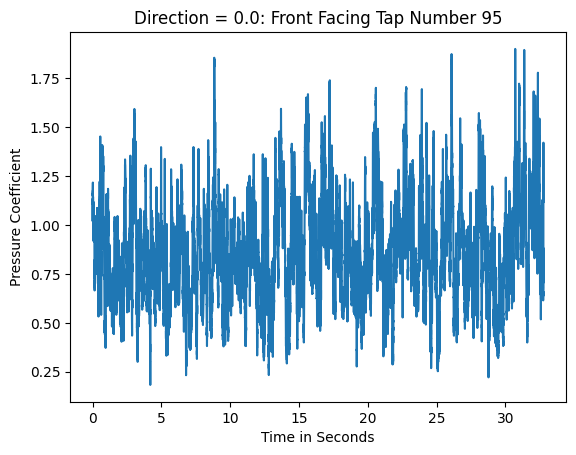

In [9]:
#Import data 
#Read the matlab data

#number of wind angles 
n_wind = 19

#Wind directions 
min_wind_dxn = 0
max_wind_dxn = 90
wind_dxns = np.linspace(min_wind_dxn, max_wind_dxn, n_wind)
data_mat = []

for i in range(n_wind): 
    file_name  = "../../../data/T215_4_{:03d}_1.mat".format(int(wind_dxns[i]))
    print("Now reading: ", file_name)
    data_mat.append(loadmat(file_name))

#Figure out the dimention from the first wind direction
mat_size = np.shape(data_mat[0]["Wind_pressure_coefficients"])

#Number of timesteps 
n_time  = mat_size[0]

#number of taps 
n_taps  = mat_size[1]

#3d matix (tap number, time, wind angle)
cp_mat = np.zeros((n_wind, n_time, n_taps ))

#take just the wind pressure coefficient matrix
for i in range(n_wind): 
    cp_mat[i, :, :] = data_mat[i]["Wind_pressure_coefficients"]

# cp_mat[:,:,0] = cp00
# cp_mat[:,:,1] = cp05
# cp_mat[:,:,2] = cp10
# cp_mat[:,:,3] = cp15
# cp_mat[:,:,4] = cp20
# cp_mat[:,:,5] = cp25
# cp_mat[:,:,6] = cp30
# cp_mat[:,:,7] = cp35
# cp_mat[:,:,8] = cp40
# cp_mat[:,:,9] = cp45
# cp_mat[:,:,10] = cp50
# cp_mat[:,:,11] = cp55
# cp_mat[:,:,12] = cp60
# cp_mat[:,:,13] = cp65
# cp_mat[:,:,14] = cp70
# cp_mat[:,:,15] = cp75
# cp_mat[:,:,16] = cp80
# cp_mat[:,:,17] = cp85
# cp_mat[:,:,18] = cp90

print(n_time)
print(n_taps)
print(n_wind)

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n_time
# x = the time at each point 
x = np.linspace(0, T, n_time, False) 


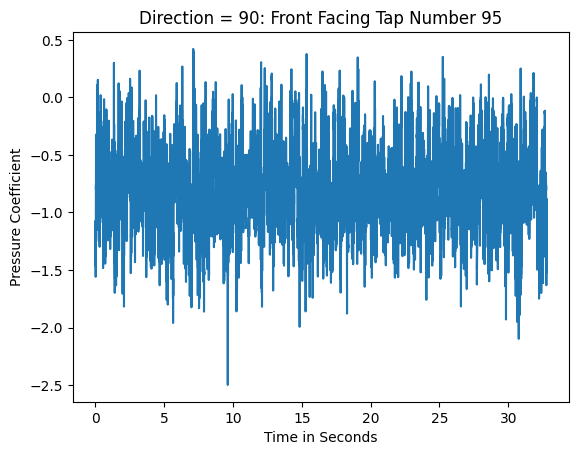

In [13]:
#Plot Sample 

dxn_no = 18
tap_no = 95

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()




Plot Right Sideward Tap 103

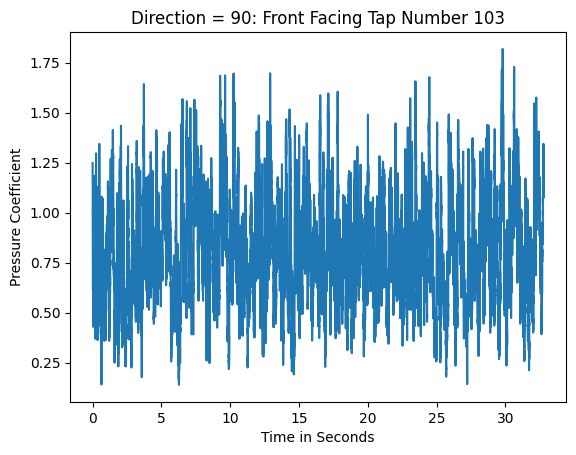

In [14]:
#Plot Sample 

dxn_no = 18
tap_no = 103

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Leeward Tap 111

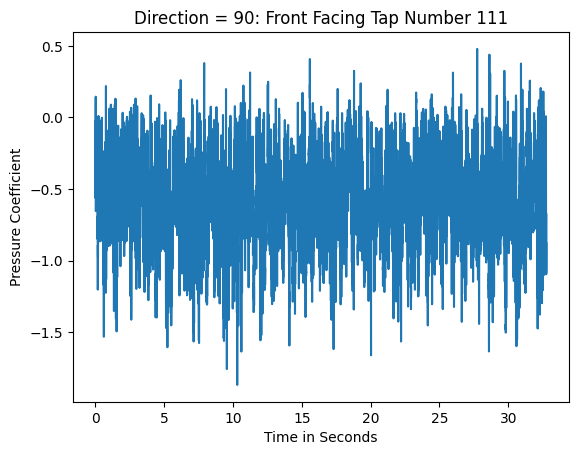

In [15]:
#Plot Sample 

dxn_no = 18
tap_no = 111

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Left Sideward Tap 118

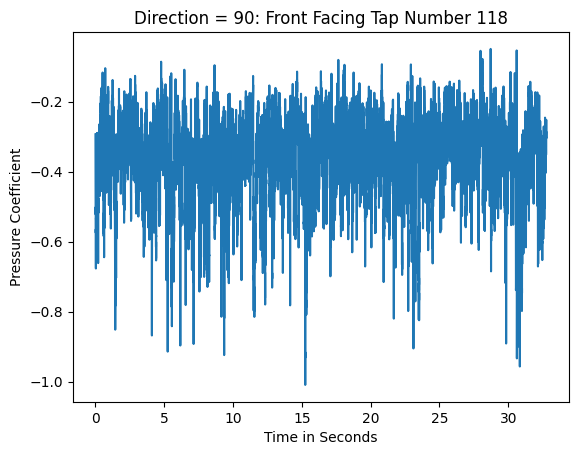

In [16]:
#Do the same but for a left Side tap 
#Plot Sample 

dxn_no = 18
tap_no = 118

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Short duration Split 

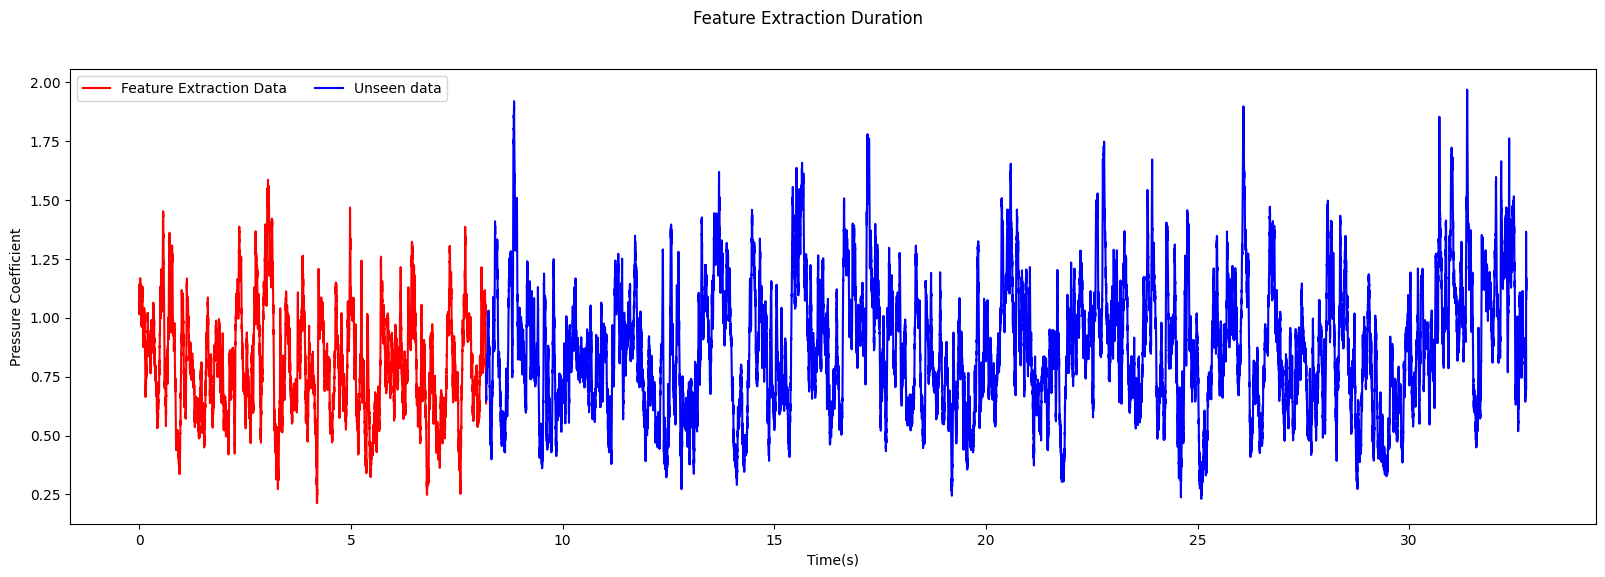

In [40]:
#n= number of timesteps 

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n_time
# x = the time at each point 
x = np.linspace(0, T, n_time, False)
#cp_mat = np.zeros((n_wind, n_time, n_taps ))
tap_no = 95
cp_mat_y = y = cp_mat[0, :, 95 ]
y = cp_mat[0, :, 95 ]

fig, (ax) = plt.subplots()
fig.suptitle('Feature Extraction Duration')
data_percent = 0.25
duration = int(data_percent*n_time)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Pressure Coefficient')
ax.plot(x[:duration], y[:duration], 'r-', linewidth=1.5)
ax.plot(x[duration:], y[duration:], 'b-', linewidth=1.5)

#ax.set_xlim(left=0, right=5)
#ax.set_ylim(bottom=0, top=5)

ax.legend(['Feature Extraction Data', 'Unseen data'], ncol=2, frameon=True) 
fig.set_size_inches(50/2.54, 15/2.54) 
#plt.tight_layout()
#fig.savefig('Plots/MLP_devided_data_sample.pdf')
#fig.savefig('Plots/MLP_devided_data_sample.png')
#plt.show()

Define Min and Max Peak Function 

In [53]:
def lieblin_blue(x):
    """
    Performs Lieblin Blue fitted peak values for a time series in 'x'.
    If the time series cannot be divided into 10 equal segments the remaining
    part is discarded.
    """
    #Coefficient used for the Lieblein Blue fit
    a = [ 0.222867,  0.162308,  0.133845, 0.112868, 0.095636, 0.080618, 0.066988, 0.054193, 0.041748, 0.028929]
    b = [-0.347830, -0.091158, -0.019210, 0.022179, 0.048671, 0.066064, 0.077021, 0.082771, 0.083552, 0.077940]
    n_seg = 10 #Number of segments
    #Min and max of each segment
    x_max = np.zeros(n_seg)
    x_min = np.zeros(n_seg)
    #Number of time steps per each segment
    n_per_seg = int(np.rint(len(x)/n_seg))
    #Calculate the min and max of each segment.
    for i in range(n_seg):
        x_max[i] = np.amax(x[i*n_per_seg:(i+1)*n_per_seg])
        x_min[i] = np.amin(x[i*n_per_seg:(i+1)*n_per_seg])
    x_max = np.sort(x_max)      #sort in assending order
    x_min = -np.sort(-x_min)    #sort in decending order
    #Calculate the mode and dispertions
    u_max = np.dot(a,x_max)
    u_min = np.dot(a,x_min)
    d_max = np.dot(b,x_max)
    d_min = np.dot(b,x_min)
    #Calculate the peak based on Gambel distribution.
    x_peak_gb_max = u_max + d_max*np.log(n_seg)
    x_peak_gb_min = u_min + d_min*np.log(n_seg)
    #Calculate the stable peak using Lieblein Blue method.
    x_peak_lb_max = x_peak_gb_max + 0.5772*d_max
    x_peak_lb_min = x_peak_gb_min + 0.5772*d_min
    return x_peak_lb_max, x_peak_lb_min

In [35]:
cp_mat_short = [:,:duration,:]
print(cp_mat_short.shape)

SyntaxError: invalid syntax (2759833648.py, line 1)

## Create Features in numpy

In [61]:
n_features  = 8

#cp_mat = np.zeros((n_wind, n_time, n_taps ))\
n_features = 7
features = np.zeros((n_wind, n_taps, n_features))

#cp_mat = np.zeros((n_wind, n_time, n_taps ))
#feature(wind_dxn,tap_num, feature)

cp_mat_short = cp_mat[:,:duration,:]
print(cp_mat_short.shape)

# for k in range(n_wind):
features[:,:,0] = np.mean(cp_mat_short, axis=1) #how to I make it so it only takes wind direction k, is it about axis 1 or 2? 
features[:,:,1] = np.std(cp_mat_short, axis=1)
features[:,:,2] = scipy.stats.skew(cp_mat_short, axis=1)
features[:,:,3] = scipy.stats.kurtosis(cp_mat_short, axis=1)
features[:,:,4] = np.max(cp_mat_short, axis=1)
features[:,:,5] = np.min(cp_mat_short, axis=1)
features[:,:,6] = features[:,:,4] - features[:,:,5] #range

# features[:,:,7] = wind_dxns

np.shape(features)

#Does wind anle need to be an output too? 
min_peak = np.zeros((n_wind, n_taps))
max_peak = np.zeros((n_wind, n_taps)) 
peak = np.zeros((n_wind,n_taps,2))
# peak[:,0] = np.max(cp, axis=0)
for j in range(n_wind):
   for k in range(n_taps):
      max_peak[j, k], min_peak[j, k] = lieblin_blue(cp_mat[j, :, k]) 
peak[:,:,0] = max_peak
peak[:,:,1] = min_peak
print(max_peak.shape)
print(features.shape)
print(peak.shape)

(19, 8192, 510)
(19, 510)
(19, 510, 7)
(19, 510, 2)


Change the array into two dimentions

In [68]:
n_features  = 7

features_2d = np.zeros((n_wind*n_taps, n_features))
peak_2d = np.zeros((n_wind*n_taps,2))
#cp_mat = np.zeros((n_wind, n_time, n_taps ))
#feature(wind_dxn,tap_num, feature)

for i in range(n_wind):
    features_2d[n_taps*i:n_taps*(i+1), :] = features[i, :, :]

for i in range(n_wind):
    peak_2d[n_taps*i:n_taps*(i+1), :] = peak[i,:,:]


print(features_2d.shape)
print(peak_2d.shape)
max_peak = np.zeros(n_wind*n_taps)
min_peak = np.zeros(n_wind*n_taps)
max_peak = peak_2d[:,0] 
min_peak = peak_2d[:,1] 



(9690, 7)
(9690, 2)
(9690,)


Shuffle the sensors into a random order 

In [58]:
import random

# Create a list of numbers from 0 to 509*19
numbers = list(range(n_taps*n_wind))

# Shuffle the numbers randomly
random.shuffle(numbers)

# Print the shuffled numbers
print(numbers)


[5961, 4252, 1896, 2544, 9209, 9196, 7877, 9595, 4043, 5659, 5390, 3445, 4477, 1692, 8124, 4084, 6076, 6907, 3210, 4684, 3002, 907, 1365, 3229, 7421, 2268, 5731, 2574, 7231, 2935, 7619, 5859, 4174, 2053, 8313, 3984, 2825, 1169, 3301, 3352, 5645, 7284, 9512, 1167, 1968, 8261, 3208, 6789, 5455, 5910, 1885, 1196, 7579, 1699, 8120, 6869, 1339, 6806, 4074, 7583, 2248, 3241, 7536, 5620, 7160, 4991, 4503, 4306, 176, 9090, 6804, 4564, 8079, 7192, 3125, 1338, 2499, 7364, 8300, 894, 6444, 5291, 1129, 4110, 8456, 3460, 2932, 7683, 3094, 7565, 2767, 4064, 2412, 4584, 8916, 7709, 3388, 6200, 6044, 6199, 9214, 4430, 9643, 6994, 1888, 583, 1938, 6819, 1474, 1833, 2914, 7488, 126, 4599, 9459, 5063, 451, 7439, 2745, 8501, 2748, 2411, 6761, 8852, 4312, 8799, 8197, 9398, 8707, 5997, 1994, 9631, 9424, 2876, 973, 8430, 2054, 6820, 640, 327, 6093, 9274, 9409, 516, 586, 3411, 8955, 8483, 4350, 5737, 4671, 9633, 8182, 7542, 3422, 7151, 2719, 3995, 8196, 5867, 2498, 7184, 2598, 2256, 6542, 2678, 1127, 2887, 91

Split the sensors into training, validating, and testing and add features and peaks into respective arrays 

In [69]:

#number of taps in training, testing, and validating 
n_training = int(0.8*n_taps*n_wind)
n_validation = int(0.1*n_taps*n_wind)
n_testing = int(0.1*n_taps*n_wind)

train_features = np.zeros(( n_training, n_features))
train_peak = np.zeros((n_training, 2))


validate_features = np.zeros((n_validation, n_features))
validate_peak = np.zeros((n_validation,2))

test_features = np.zeros((n_testing, n_features))
test_peak = np.zeros((n_testing,2))

for i in range(0, n_training):
    idx = numbers[i]
    train_features[i,:] = features_2d[idx, :]
    train_peak[i,0] = max_peak[idx]
    train_peak[i,1] = min_peak[idx]

for i in range(0, n_validation):
    idx = numbers[i+n_testing]
    validate_features[i,:] = features_2d[idx, :]
    validate_peak[i,0] = max_peak[idx]
    validate_peak[i, 1] = min_peak[idx]


for i in range(0, n_testing):
    idx = numbers[i+n_testing+n_validation]
    test_features[i,:] = features_2d[idx, :] 
    test_peak[i, 0] = max_peak[idx]
    test_peak[i, 1] = min_peak[idx]

Convert inputs and outputs to torch 

In [70]:
train_features_tor = torch.from_numpy(train_features.astype(np.float32))
train_peak_tor = torch.from_numpy(train_peak.astype(np.float32))


validate_features_tor = torch.from_numpy(validate_features.astype(np.float32))
validate_peak_tor = torch.from_numpy(validate_peak.astype(np.float32))


test_features_tor = torch.from_numpy(test_features.astype(np.float32))
test_peak_tor = torch.from_numpy(test_peak.astype(np.float32))


Create MLP model using Pytorch 

In [71]:


class MyMLP(nn.Module):
    "Defines a connected network"
    #N_input = 7  
    #N_output = 2 because we just have min and max peak 
    #N_hidden is number neurons in hidden layers 
    #N_layers is total num of layers
    #nn.sequential repeat process without having to write out ever layer 
    #x is the output 
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.ReLU
        self.MLP1 = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.MLP2 = nn.Sequential(*[
                        nn.Sequential(*[
                        nn.Linear(N_HIDDEN, N_HIDDEN),
                        activation()]) for _ in range(N_LAYERS-1)])
        self.MLP3 = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.MLP1(x)
        x = self.MLP2(x)
        x = self.MLP3(x)
        return x


Train the model 

In [76]:
def train_model(model, criterion, optimizer, x_train, x_valid, y_train, y_valid, epochs=500):
    
    train_loss = np.zeros(epochs)
    valid_loss = np.zeros(epochs)
    
    for epoch in range(epochs):
        
        # put default model grads to zero
        optimizer.zero_grad()
        
        # predict the output
        pred = model(train_features_tor)
        
        # calculate the loss 
        error = criterion(pred,train_peak_tor) #???????????????????????
        
        # backpropagate the error
        error.backward()
        
        # update the model parameters
        optimizer.step()
        
        # save the losses 
        train_loss[epoch] = error.item()
        
        # Validation loss 
        valid_pred = model(validate_features_tor)
        valid_error = criterion(validate_peak_tor,valid_pred) #????????????????????????????
        valid_loss[epoch] = valid_error.item() 
        
        if (epoch+1) % 5 ==0:
            print('Epoch :{}    Train Loss :{}    Validation Loss :{}'.format((epoch+1)/epochs, error.item(), valid_error.item()))
            
    return train_loss, valid_loss


    

#Training

In [74]:
#def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
#def __init__(self, in_dim, hid_dim, out_dim, num_layers):
#in_size = window_size
#out_size = 1
#hid_size = 5
#num_layers = 2
num_epochs = 500

N_INPUT = 7
N_OUTPUT = 2
N_HIDDEN = 3
N_LAYERS = 5

mlp_model = MyMLP(N_INPUT,N_OUTPUT,N_HIDDEN, N_LAYERS = 5)

optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.01)
loss_fun = nn.MSELoss()

#Run the model
train_loss, valid_loss = train_model(mlp_model,
               loss_fun,
               optimizer,
               train_features_tor,
               validate_features_tor,
               train_peak_tor,
               validate_peak_tor,
               num_epochs)

Epoch :0.01    Train Loss :2.2393031120300293    Validation Loss :2.2107956409454346
Epoch :0.02    Train Loss :1.923265814781189    Validation Loss :1.88589608669281
Epoch :0.03    Train Loss :1.5604019165039062    Validation Loss :1.506967306137085
Epoch :0.04    Train Loss :1.1280237436294556    Validation Loss :1.058680534362793
Epoch :0.05    Train Loss :0.6797018647193909    Validation Loss :0.6283091306686401
Epoch :0.06    Train Loss :0.5206273794174194    Validation Loss :0.5270990133285522
Epoch :0.07    Train Loss :0.4502013027667999    Validation Loss :0.443228542804718
Epoch :0.08    Train Loss :0.44135040044784546    Validation Loss :0.4390602111816406
Epoch :0.09    Train Loss :0.3947972357273102    Validation Loss :0.3889613747596741
Epoch :0.1    Train Loss :0.35965073108673096    Validation Loss :0.35142332315444946
Epoch :0.11    Train Loss :0.31840214133262634    Validation Loss :0.31571537256240845
Epoch :0.12    Train Loss :0.2913961708545685    Validation Loss :0

plot loss vs epoch 

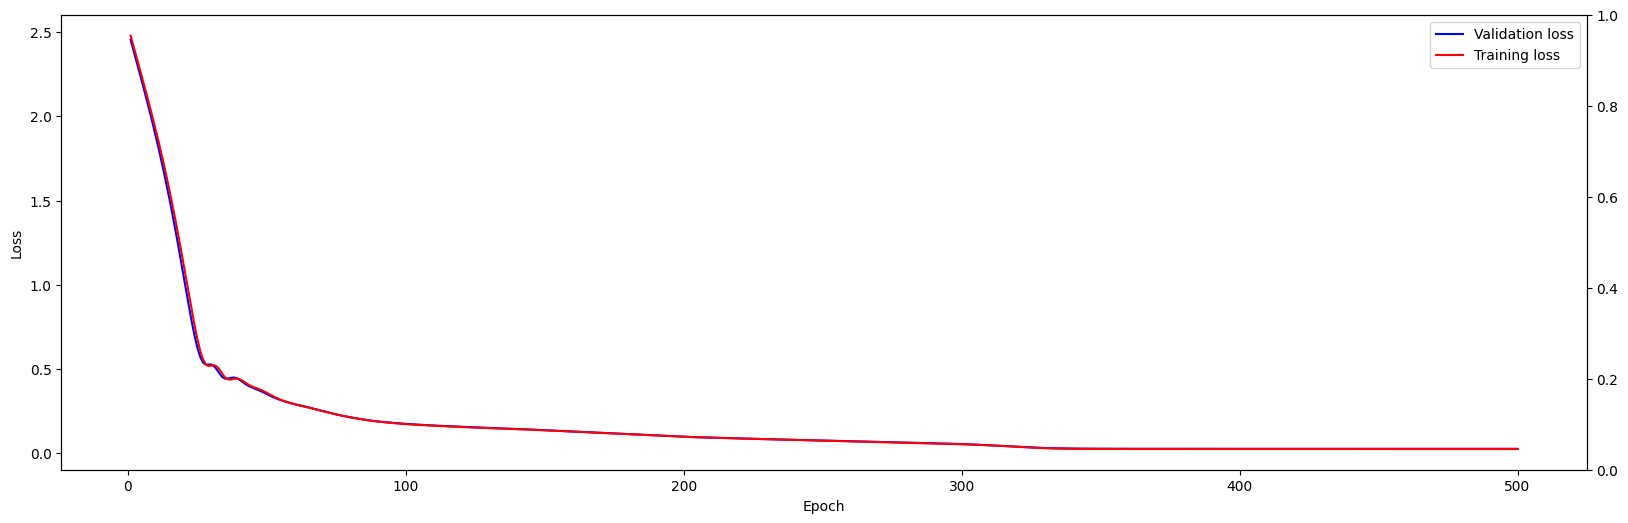

In [75]:

epoch = np.linspace(1, num_epochs, num_epochs) 
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(epoch, valid_loss, 'b-')
ax1.plot(epoch, train_loss, 'r-')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Validation loss', 'Training loss'], ncol=1, frameon=True)  
fig.set_size_inches(50/2.54, 15/2.54) 

Test the model 

torch.Size([969, 2])
torch.Size([969, 2])


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

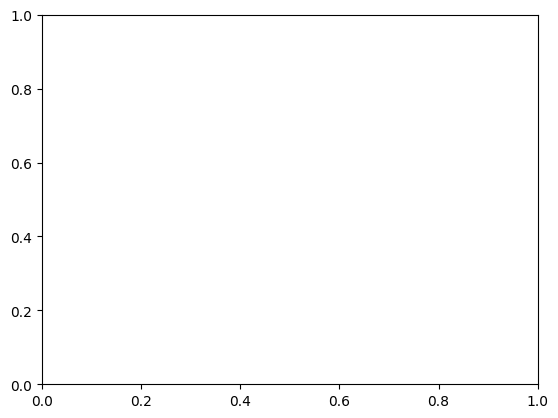

In [91]:



pred_peak = mlp_model(test_features_tor) 
pred_peak.detach().numpy()
test_peak_tor.detach().numpy()

#Plot experimental values on the x axis and pred_peak on the y axis for both positive and negative peaks 

#Do the same but for a left Side tap 
#Plot Sample 
print(test_peak_tor.shape)
print(pred_peak.shape)


plt.plot(test_peak_tor[:,0], pred_peak[:,0])
plt.ylabel('Predicted Pressure Coefficient')
plt.xlabel('Experimental Pressure Coefficient')
plt.title('Model Test')             
plt.show()

